In [1]:
#!pip install scikit-learn-intelex
#from sklearnex import patch_sklearn
#patch_sklearn()

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
NO_SPLITS = 5

In [3]:
df_train = pd.read_csv('/kaggle/input/tabular-playground-series-dec-2021/train.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 56 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Id                                  int64
 1   Elevation                           int64
 2   Aspect                              int64
 3   Slope                               int64
 4   Horizontal_Distance_To_Hydrology    int64
 5   Vertical_Distance_To_Hydrology      int64
 6   Horizontal_Distance_To_Roadways     int64
 7   Hillshade_9am                       int64
 8   Hillshade_Noon                      int64
 9   Hillshade_3pm                       int64
 10  Horizontal_Distance_To_Fire_Points  int64
 11  Wilderness_Area1                    int64
 12  Wilderness_Area2                    int64
 13  Wilderness_Area3                    int64
 14  Wilderness_Area4                    int64
 15  Soil_Type1                          int64
 16  Soil_Type2                          

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

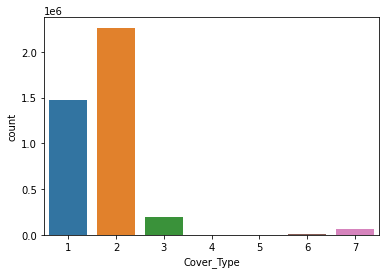

In [5]:
# Target distribution
sns.countplot(df_train["Cover_Type"])

In [6]:
def preprocessing(df):
    ##### remove class 5 as it has only 1 sample
    df.drop(df[df['Cover_Type'] == 5].index, inplace = True) # this has one observation
    df.reset_index(drop=True, inplace=True)
    return df

In [7]:
df_train = preprocessing(df_train)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999999 entries, 0 to 3999998
Data columns (total 56 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Id                                  int64
 1   Elevation                           int64
 2   Aspect                              int64
 3   Slope                               int64
 4   Horizontal_Distance_To_Hydrology    int64
 5   Vertical_Distance_To_Hydrology      int64
 6   Horizontal_Distance_To_Roadways     int64
 7   Hillshade_9am                       int64
 8   Hillshade_Noon                      int64
 9   Hillshade_3pm                       int64
 10  Horizontal_Distance_To_Fire_Points  int64
 11  Wilderness_Area1                    int64
 12  Wilderness_Area2                    int64
 13  Wilderness_Area3                    int64
 14  Wilderness_Area4                    int64
 15  Soil_Type1                          int64
 16  Soil_Type2                          

In [9]:
df_train["Cover_Type"].value_counts()

2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
Name: Cover_Type, dtype: int64

In [10]:
# Create folds
df_train["kfold"] = -1
y = df_train["Cover_Type"]
skf = StratifiedKFold(n_splits=NO_SPLITS, shuffle=True, random_state=42)
for fold, (train_indicies, valid_indicies) in enumerate(skf.split(df_train,df_train["Cover_Type"])):
    df_train.loc[valid_indicies, "kfold"] = fold

In [11]:
df_train["kfold"].value_counts()

2    800000
1    800000
3    800000
0    800000
4    799999
Name: kfold, dtype: int64

In [12]:
df_train.to_csv(f"train_folds_{NO_SPLITS}.csv",index=False)